In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import stdev
import os

In [2]:

Day = "16"
Month_year = "June23"
# Folder path
folder_path = os.path.join(os.getcwd(), "Csv_files")

# List CSV files in the folder
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".csv") and file.startswith(Day)]

# Lists to store averages
TC_Group_1_AVG = []
TC_Group_2_AVG = []
TC_Group_3_AVG = []
Time_Group = []
Data_type_list = []

# Iterate over CSV files
for file in csv_files:
    df = pd.read_csv(file)

    # TC1-4
    TC_1_4 = ["TC1", "TC2", "TC3", "TC4"]
    TC_1_4_AVG = df[TC_1_4].mean().mean().round(3)
    TC_Group_1_AVG.append(TC_1_4_AVG)

    # TC5-8
    TC_5_8 = ["TC5", "TC6", "TC7", "TC8"]
    TC_5_8_AVG = df[TC_5_8].mean().mean().round(3)
    TC_Group_2_AVG.append(TC_5_8_AVG)

    # TC10-13
    TC_10_13 = ["TC10", "TC11", "TC12", "TC13"]
    TC_10_13_AVG = df[TC_10_13].mean().mean().round(3)
    TC_Group_3_AVG.append(TC_10_13_AVG)

    # Time
    df['time_seconds'] = pd.to_datetime(df['Time']).dt.hour * 3600 + pd.to_datetime(df['Time']).dt.minute * 60
    AVG_Time = df['time_seconds'].mean()
    AVG_Time_Hour = AVG_Time * (1 / 3600)
    Time_Group.append(round(AVG_Time_Hour, 2))

# Time from 0
First = Time_Group[0]
Time_From_0 = [round(x - First, 2) for x in Time_Group]

# Create DataFrame
data = {
    "Time": Time_From_0,
    "G1TAverage": TC_Group_1_AVG,
    "G2TAverage": TC_Group_2_AVG,
    "G3TAverage": TC_Group_3_AVG
}
T_avg_chart = pd.DataFrame(data)
T_avg_chart


,Time,G1TAverage,G2TAverage,G3TAverage
0,0.00,22.641,22.543,12.315
1,0.27,78.468,47.610,11.215
2,1.04,81.510,72.247,19.423
3,1.20,86.021,72.460,19.515
4,1.37,85.342,74.116,19.820
5,1.62,86.142,74.951,20.093
6,1.83,86.598,75.440,19.965
7,2.16,86.871,75.810,18.201
8,2.41,86.902,75.813,18.164
9,2.72,86.957,75.745,18.429


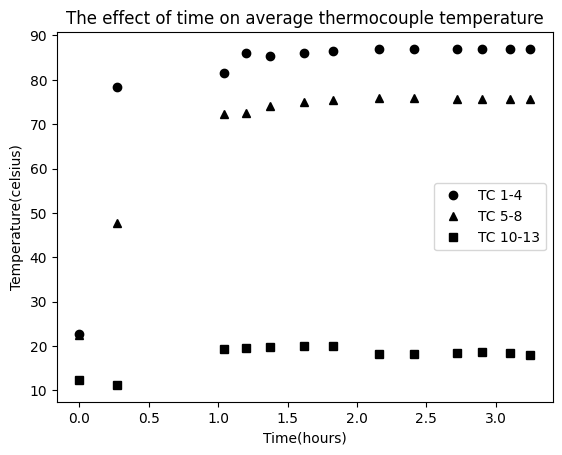

In [3]:
#varialable setup
y1 = T_avg_chart['G1TAverage']
y2 = T_avg_chart['G2TAverage']
y3 = T_avg_chart['G3TAverage']
#graph setup
plt.plot(Time_From_0,y1,'o',label="TC 1-4", color=("black"))
plt.plot(Time_From_0,y2,'^',label="TC 5-8",color=("black"))
plt.plot(Time_From_0,y3,'s',label="TC 10-13",color=("black"))
plt.xlabel('Time(hours)')
plt.ylabel("Temperature(celsius)")
plt.title("The effect of time on average thermocouple temperature")
plt.legend()
T_vs_time = plt.gca()

In [4]:
SD_1_T = []
SD_2_T = []
SD_3_T = []

for file in csv_files:
    TC_AVG_1_4 = []
    TC_AVG_5_8 = []
    TC_AVG_10_13 = []
    df = pd.read_csv(file)

    for i in range(1, 5):
        TC = df[f"TC{i}"].mean()
        TC_AVG_1_4.append(TC)

    for i in range(5, 9):
        TC = df[f"TC{i}"].mean()
        TC_AVG_5_8.append(TC)

    for i in range(10, 14):
        TC = df[f"TC{i}"].mean()
        TC_AVG_10_13.append(TC)

    SD_1_T.append(np.std(TC_AVG_1_4))
    SD_2_T.append(np.std(TC_AVG_5_8))
    SD_3_T.append(np.std(TC_AVG_10_13))

data = {
    "Time": Time_From_0,
    "G1Average": SD_1_T,
    "G2Average": SD_2_T,
    "G3Average": SD_3_T
}
Standard_deviation = pd.DataFrame(data)
Standard_deviation


,Time,G1Average,G2Average,G3Average
0,0.00,0.103209,0.332310,1.240394
1,0.27,3.470406,0.529274,1.598302
2,1.04,0.832489,1.288668,5.707731
3,1.20,1.347398,1.327392,5.792200
4,1.37,1.044138,1.387479,5.735306
5,1.62,1.030876,1.429888,5.923956
6,1.83,1.022049,1.503674,5.783492
7,2.16,1.005100,1.502357,6.231186
8,2.41,0.999169,1.462812,6.155225
9,2.72,1.004371,1.454731,6.224081


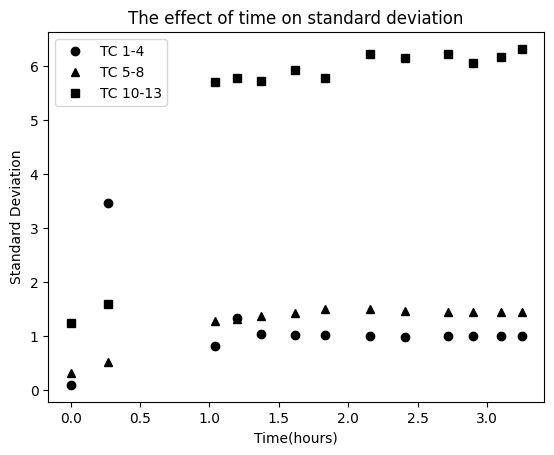

In [5]:
#varialable setup
y1 = Standard_deviation['G1Average']
y2 = Standard_deviation['G2Average']
y3 = Standard_deviation['G3Average']
#graph setup
plt.plot(Time_From_0,y1,'o',label="TC 1-4", color=("black"))
plt.plot(Time_From_0,y2,'^',label="TC 5-8",color=("black"))
plt.plot(Time_From_0,y3,'s',label="TC 10-13",color=("black"))
plt.xlabel('Time(hours)')
plt.ylabel("Standard Deviation")
plt.title("The effect of time on standard deviation")
plt.legend()
SD_vs_time = plt.gca()

In [6]:
DT_SS_tot = []
DT_PG_tot = []
K = []

for i in range(len(T_avg_chart)):
    DT_1 = T_avg_chart.at[i, "G1TAverage"] - T_avg_chart.at[i, "G2TAverage"]
    DT_2 = T_avg_chart.at[i, "G2TAverage"] - T_avg_chart.at[i, "G3TAverage"]
    stuff = ((DT_2 / 0.0127) * (0.01667 / DT_1)) * 0.18
    K.append(round(stuff, 3))

data = {
    "Time": Time_From_0,
    "Thermal Conductivity": K
}
Thermal_conductivity = pd.DataFrame(data)
Thermal_conductivity


,Time,Thermal Conductivity
0,0.00,24.659
1,0.27,0.279
2,1.04,1.347
3,1.20,0.922
4,1.37,1.143
5,1.62,1.158
6,1.83,1.175
7,2.16,1.231
8,2.41,1.228
9,2.72,1.208


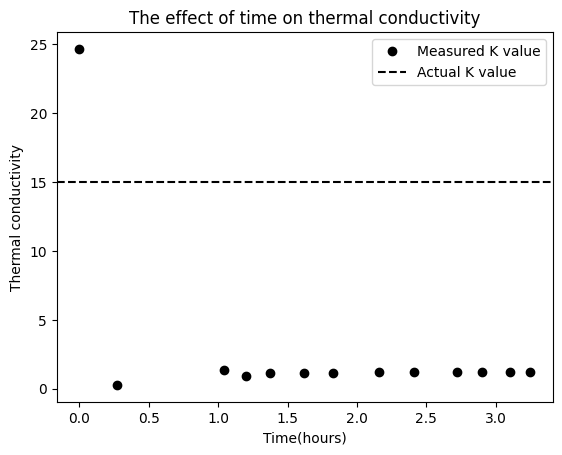

In [7]:
#varialable setup
y1 = Thermal_conductivity['Thermal Conductivity']
y2 = 15

#graph setup
plt.plot(Time_From_0,y1,'o',label="Measured K value", color=("black"))
#plt.plot(Time_From_0,y2, "-", label="Actual K value", color=("black"))
plt.axhline(y = 15, color = 'black', linestyle = '--', label="Actual K value")
plt.xlabel('Time(hours)')
plt.ylabel("Thermal conductivity")
plt.title("The effect of time on thermal conductivity")
plt.legend()
K_vs_time = plt.gca()

In [8]:
save = False
list = ["_average_temperature","_standard_deviation","_thermal_conductivity"]
mist = [T_avg_chart,Standard_deviation,Thermal_conductivity]

length = len(list)
if save == True:
    Charts_folder_path = r"C:\Users\villa\Documents\GitHub\FAST\FAST codes\Charts\\"+Day+ Month_year
    os.makedirs(Charts_folder_path)
    for i in list:
            x = 0 
            var = mist[x]
            save_folder = fr"C:\\Users\\villa\\Documents\\GitHub\\FAST\\FAST codes\\Charts\\"+Day+ Month_year+"\\"+Day+ Month_year+f"{i}.csv"
            var.to_csv(save_folder, index=False, header=True)
            save_folder = fr"C:\Users\\villa\\Documents\\GitHub\\FAST\\FAST codes\\Charts\\"+Day+ Month_year+"\\"+Day+ Month_year+f"{i}.xlsx"
            var.to_excel(save_folder, index=False, header=True)
            x += 1
        
        
        

In [9]:
save = False
list = ["_average_temperature_vs_time","_standard_deviation_vs_time","_thermal_conductivity_vs_time"]
mist = [T_vs_time,SD_vs_time,K_vs_time]

length = len(list)
if save == True:
    Graphs_folder_path = r"C:\Users\villa\Documents\GitHub\FAST\FAST codes\Graphs\\"+Day+ Month_year
    os.makedirs(Graphs_folder_path)
    for i in list:
            x = 0 
            var = mist[x]
            save_folder = fr"C:\\Users\\villa\\Documents\\GitHub\\FAST\\FAST codes\\Graphs\\"+Day+ Month_year+"\\"+Day+ Month_year+f"{i}.pdf"
            var.figure.savefig(save_folder, format='pdf')
            
            